In [1]:
%load_ext autoreload
%autoreload 1
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
%matplotlib inline
import seaborn as sns

from set_img import *
from models import *


Using TensorFlow backend.


# II. Exploratory Data Analysis

In [3]:
# Get dataframe, perform data cleaning, and add new columns of relevant data
df = set_df()

### The overwhelming majority in our dataset is Melanocytic Nevi, followed by Melanoma, and Begnin Keratosis


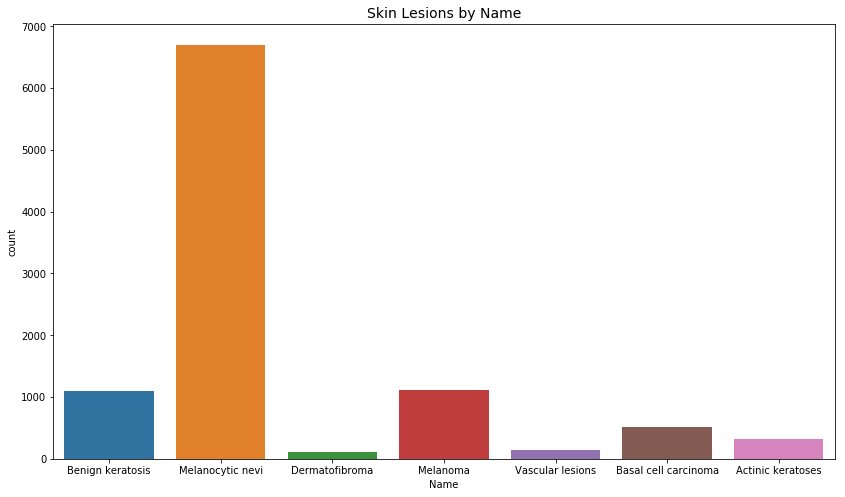

In [19]:
plt.figure(figsize=(14,8))
plt.title("Skin Lesions by Name", fontsize=14)
sns.countplot(df.category_name)
plt.xlabel('Name');

### People between the ages of 40 to 55 are most affected by this condition

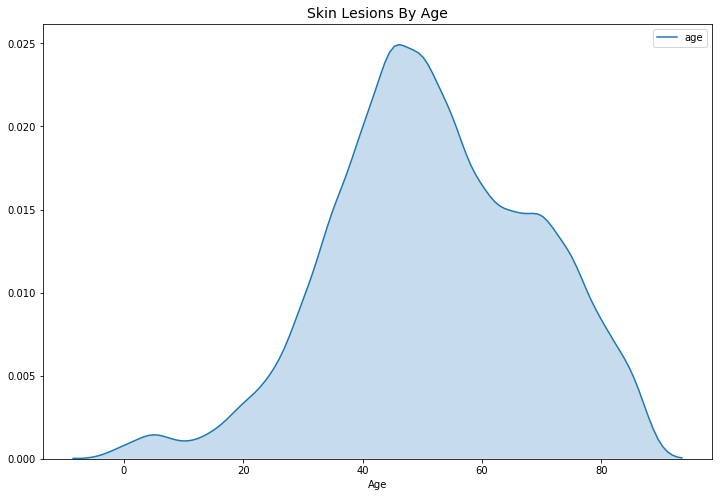

In [11]:
plt.figure(figsize=(12,8))
plt.title("Skin Lesions By Age", fontsize=14)
sns.kdeplot(df['age'],shade=True)
plt.xlabel('Age');

### The back and local extremities is where we find the majority of these bad actors

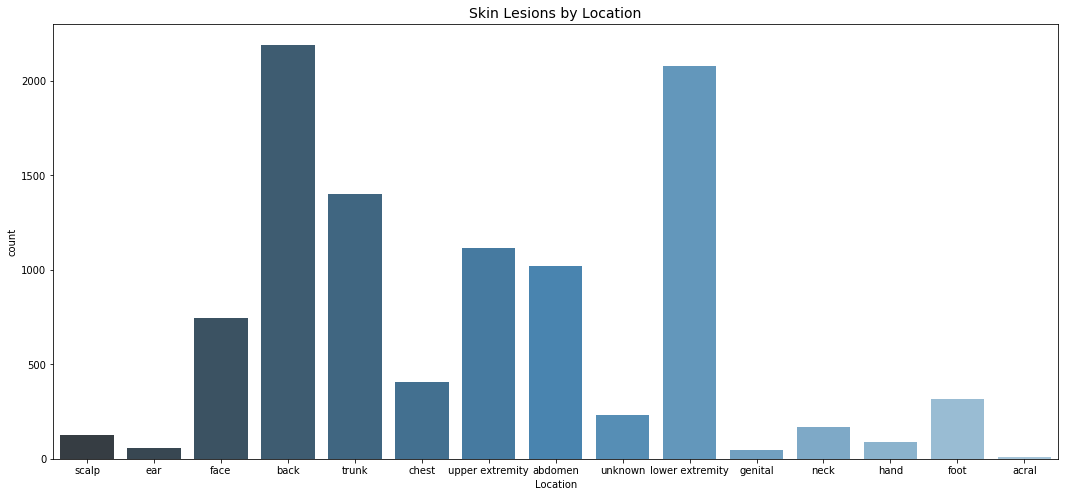

In [31]:
plt.figure(figsize=(18,8))
plt.title("Skin Lesions by Location", fontsize=14)
sns.countplot(df.localization, palette='Blues_d')
plt.xlabel('Location');

### Men are more afflicted than women

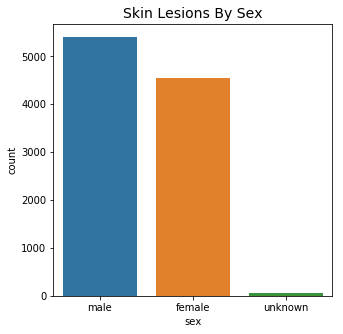

In [11]:
plt.figure(figsize=(5,5))
plt.title("Skin Lesions By Sex", fontsize=14)
sns.countplot(df.sex);

### Images of the various skin lesion categories

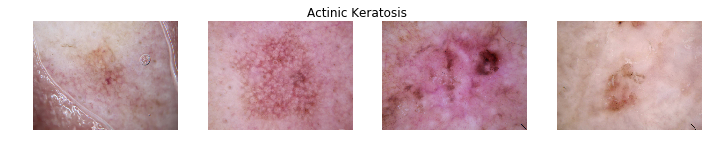

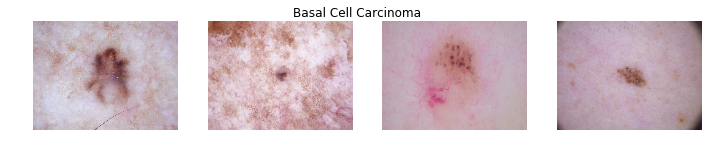

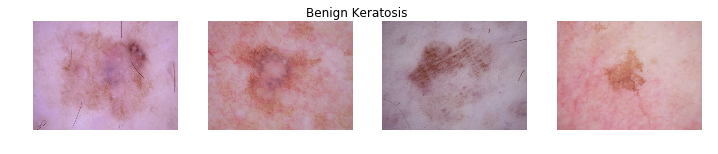

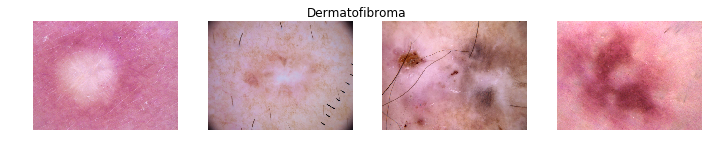

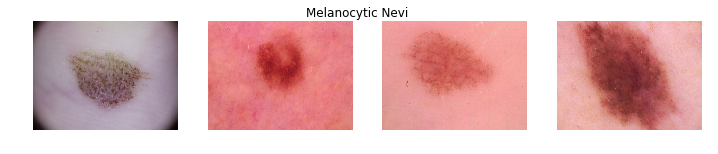

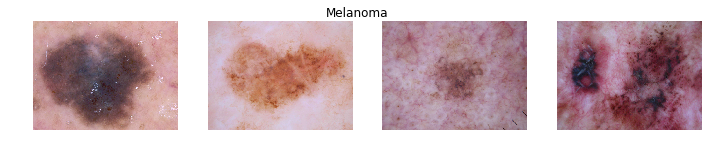

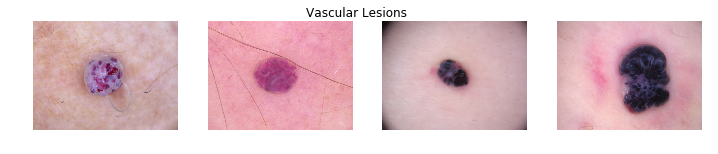

In [4]:
# Get 28 images (4 per category - total categories=7)
img_dic=display_images()
# Displaying the skin lesions images
plot_skin_images(img_dic['Actinic_Keratosis_0'], 'Actinic Keratosis'); plot_skin_images(img_dic['Basal_Cell_Carcinoma_1'], 'Basal Cell Carcinoma'); plot_skin_images(img_dic['Benign_Keratosis_2'], 'Benign Keratosis'); plot_skin_images(img_dic['Dermatofibroma_3'], 'Dermatofibroma'); plot_skin_images(img_dic['Melanocytic_Nevi_4'], 'Melanocytic Nevi');plot_skin_images(img_dic['Melanoma_5'], 'Melanoma'); plot_skin_images(img_dic['Vascular_Lesions_6'], 'Vascular Lesions')



# III. Models

## Baseline Model: Random chance - 1/7 classification or 14.28% accuracy

---------------------------------------------------------------------------------------------------------------------

## Model 1 is a CNN with 1 Convolution layer and 1 Dense layer

### Results: precision and recall of 52% but only predicts 2/7 categories

In [33]:
print(set_cnn_model())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 86, 116, 64)       1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 86, 116, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 58, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 159616)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                5107744   
_________________________________________________________________
dropout_1 (Dropout)  

Found 2000 images belonging to 7 classes.
Found 30050 images belonging to 7 classes.
Found 1600 images belonging to 7 classes.
2000/2000 [==============================] - 30s 15ms/step


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

   Actinic keratoses       0.00      0.00      0.00        65
Basal cell carcinoma       0.00      0.00      0.00       102
    Benign keratosis       0.00      0.00      0.00       219
      Dermatofibroma       0.00      0.00      0.00        23
    Melanocytic nevi       0.83      0.64      0.72      1341
            Melanoma       0.19      0.81      0.30       222
    Vascular lesions       0.00      0.00      0.00        28

           micro avg       0.52      0.52      0.52      2000
           macro avg       0.14      0.21      0.15      2000
        weighted avg       0.57      0.52      0.52      2000



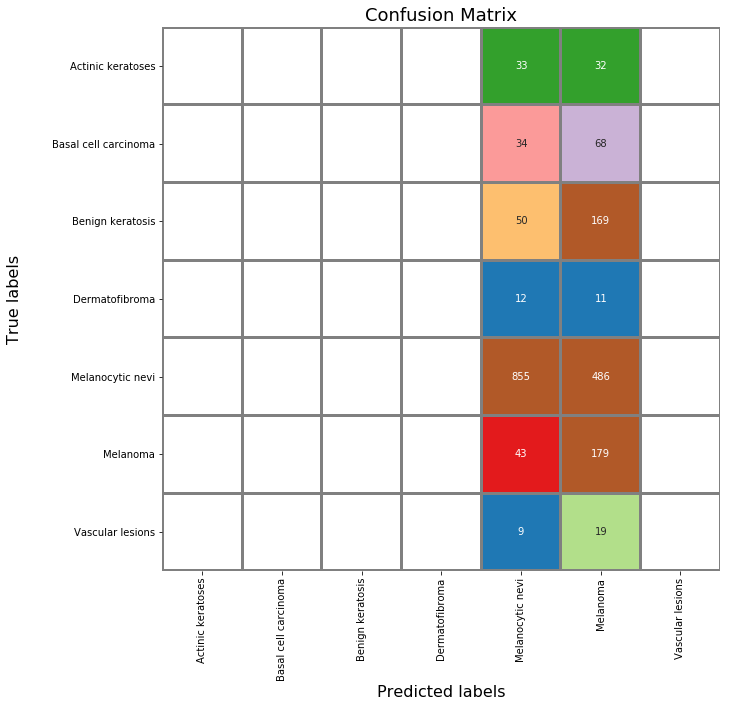

In [26]:
load_display_model('../SkinCancerClassifier/saved_models/CNN_1.h5') # 112 x 150 pixels

## Model 2 is a CNN with 2 Convolution layers, 1 Dense layer, and L2 Regularization

### Results: precision and recall of 53% but only predicts 5/7 categories

In [35]:
# Print model architecture
print(set_cnn_bn_l2_model())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 90, 120, 128)      512       
_________________________________________________________________
batch_normalization_3 (Batch (None, 90, 120, 128)      512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 60, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 58, 64)        73792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 43, 58, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 29, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 38976)             0         
__________

Found 2000 images belonging to 7 classes.
Found 30050 images belonging to 7 classes.
Found 1600 images belonging to 7 classes.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2000/2000 [==============================] - 31s 15ms/step


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

   Actinic keratoses       0.17      0.02      0.03        65
Basal cell carcinoma       0.00      0.00      0.00       102
    Benign keratosis       0.19      0.14      0.16       219
      Dermatofibroma       0.01      0.04      0.01        23
    Melanocytic nevi       0.76      0.75      0.75      1341
            Melanoma       0.00      0.00      0.00       222
    Vascular lesions       0.05      0.57      0.09        28

           micro avg       0.53      0.53      0.53      2000
           macro avg       0.17      0.22      0.15      2000
        weighted avg       0.53      0.53      0.53      2000



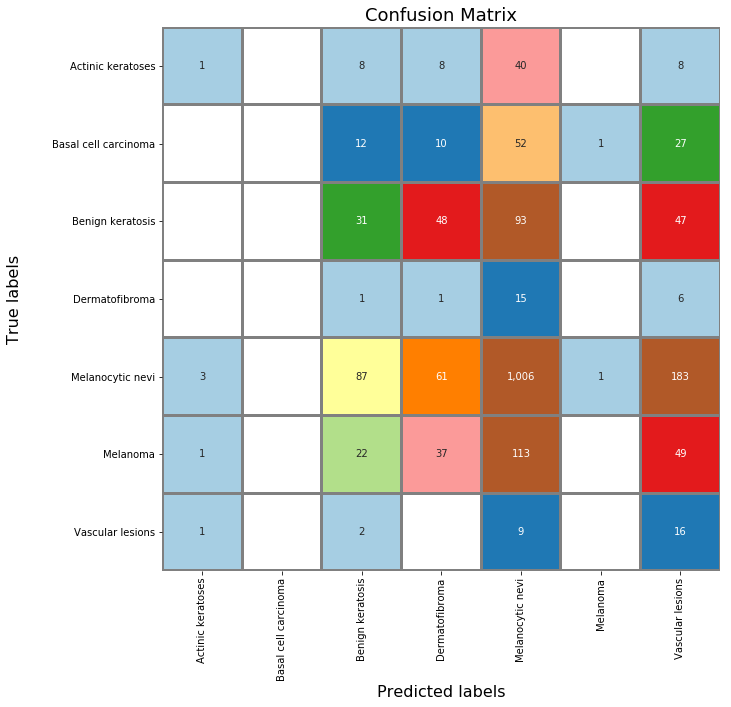

In [31]:
# Load model, print classification report, and plot confusion matrix
load_display_model('../SkinCancerClassifier/saved_models/CNN_bnn_12.h5') #  90 x 120 pixels

# IV. Transfer Learning 

## Densenet 121 - Added 1 Dense layer to the model

### Results: precision and recall of 66% but only predicts 1/7 categories

Found 2000 images belonging to 7 classes.
Found 30050 images belonging to 7 classes.
Found 1600 images belonging to 7 classes.
2000/2000 [==============================] - 38s 19ms/step


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

   Actinic keratoses       0.00      0.00      0.00        65
Basal cell carcinoma       0.00      0.00      0.00       102
    Benign keratosis       0.00      0.00      0.00       219
      Dermatofibroma       0.00      0.00      0.00        23
    Melanocytic nevi       0.67      0.99      0.80      1341
            Melanoma       0.00      0.00      0.00       222
    Vascular lesions       0.00      0.00      0.00        28

           micro avg       0.66      0.66      0.66      2000
           macro avg       0.10      0.14      0.11      2000
        weighted avg       0.45      0.66      0.54      2000



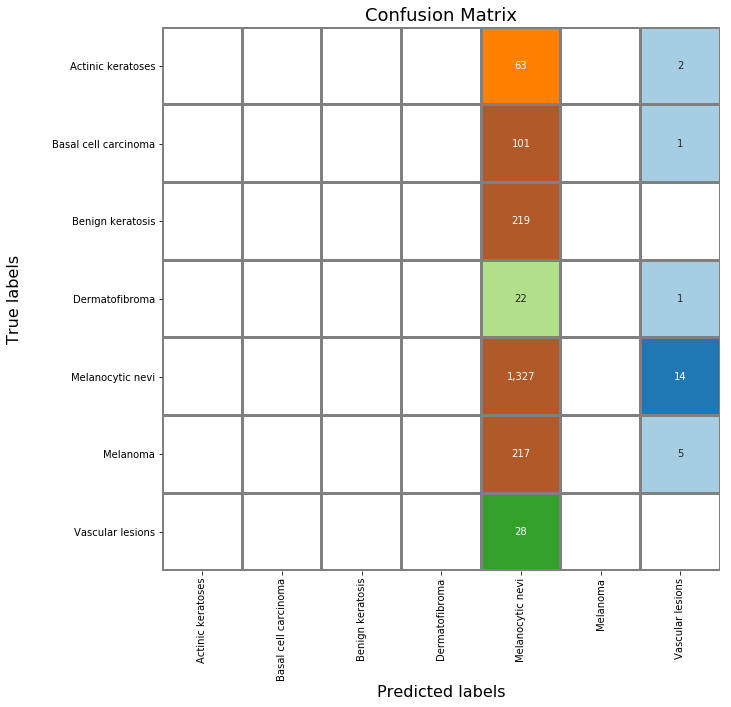

In [33]:
# Load model, print classification report, and plot confusion matrix
load_display_model('../SkinCancerClassifier/saved_models/densenet121_2.h5') # (90, 120)

## Imagenet Inception_v3 - Added 3 Dense layers to the model

### Results: precision and recall of 8% but predicts 5/7 categories

Found 2000 images belonging to 7 classes.
Found 30050 images belonging to 7 classes.
Found 1600 images belonging to 7 classes.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


2000/2000 [==============================] - 37s 18ms/step


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

   Actinic keratoses       0.00      0.00      0.00        65
Basal cell carcinoma       0.06      0.71      0.11       102
    Benign keratosis       0.19      0.32      0.24       219
      Dermatofibroma       0.06      0.17      0.09        23
    Melanocytic nevi       0.00      0.00      0.00      1341
            Melanoma       0.22      0.01      0.02       222
    Vascular lesions       0.05      0.61      0.08        28

           micro avg       0.08      0.08      0.08      2000
           macro avg       0.08      0.26      0.08      2000
        weighted avg       0.05      0.08      0.04      2000



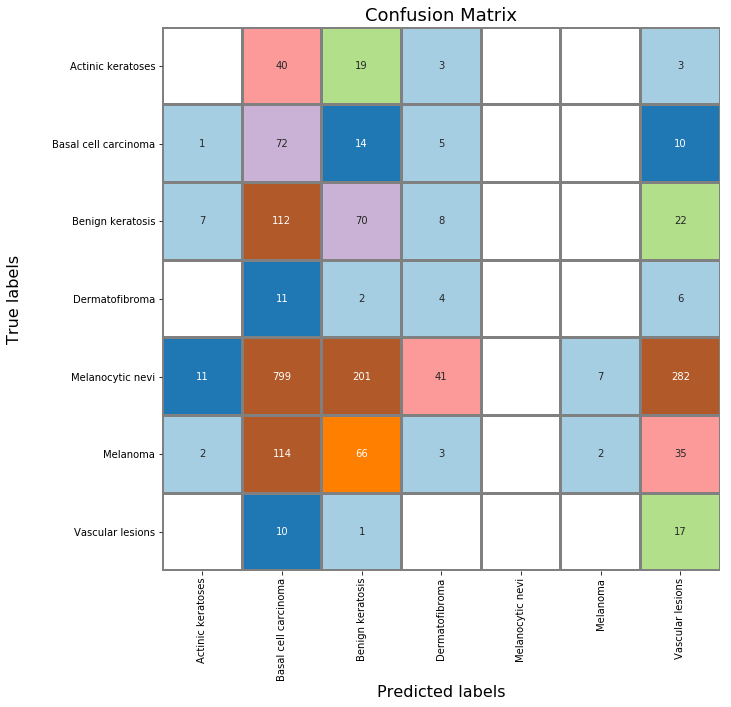

In [7]:
# Load model, print classification report, and plot confusion matrix
load_display_model('../SkinCancerClassifier/saved_models/imagenet_1156.h5') # (90,120)

## V. Best Model:  11 Convolutional layers 

### Results: 76% on precision and recall and predicts on all 7 categories

In [2]:
print(set_cnn_no_dense_model())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 88, 118, 32)       896       
_________________________________________________________________
Norm1 (BatchNormalization)   (None, 88, 118, 32)       128       
_________________________________________________________________
Conv2 (Conv2D)               (None, 86, 116, 64)       18496     
_________________________________________________________________
Norm2 (BatchNormalization)   (None, 86, 116, 64)       256       
_________________________________________________________________
Conv3 (Conv2D)               (None, 84, 114, 64)       36928     
_________________________________________________________________
Norm3 (BatchNormaliza

Found 2000 images belonging to 7 classes.
Found 30050 images belonging to 7 classes.
Found 1600 images belonging to 7 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
2000/2000 [==============================] - 67s 34ms/step
                      precision    recall  f1-score   support

   Actinic keratoses       0.45      0.38      0.41        65
Basal cell carcinoma       0.60      0.67      0.63       102
    Benign keratosis       0.53      0.60      0.57       219
      Dermatofibroma       0.42      0.43      0.43        23
    Melanocytic nevi       0.93      0.83      0.88      1341
            Melanoma       0.43      0.66      0.52       222
    Vascular lesions       0.81      0.75      0.78        28

           micro avg       0.76      0.76      0.76      2000
           macro av

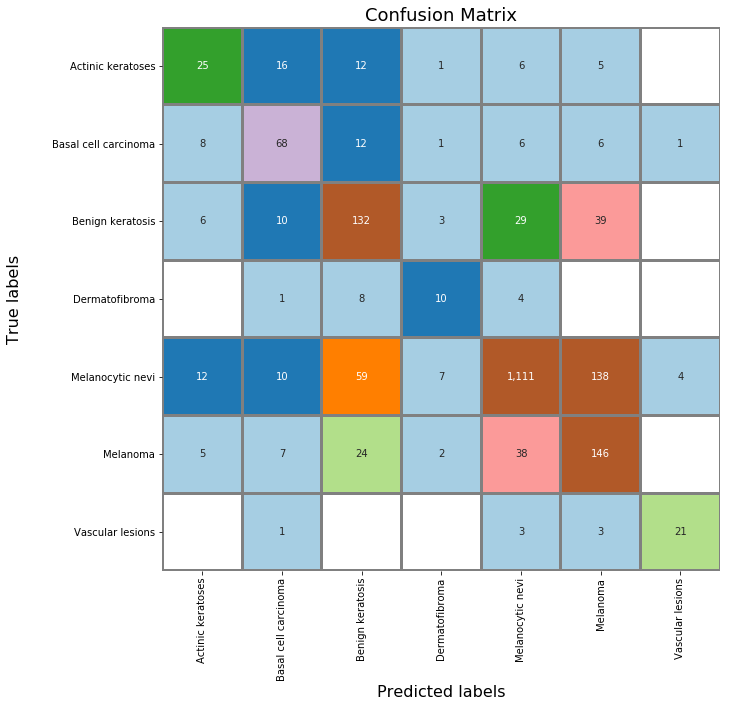

In [6]:
# Load model, print classification report, and plot confusion matrix
load_display_model('../SkinCancerClassifier/saved_models/cnn_nodense_model2.h5') # 90 x 120 pixels